In [1]:
# 표준 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

# 한글 로딩
mpl.rc('font', family='Malgun Gothic')

batter = pd.read_csv("D:/python3/data/batter_stats_2017.csv")
#batter = pd.read_csv("C:/python3/data/batter_stats_2017.csv")
batter_df = pd.DataFrame(batter)

# # BABIP ; Batted Average on Balls In Play 인플레이 (피)안타율
# # OPS ;  On base Plus Slugging 출루율+장타율
# # wOBA ; weight On-Base Average 가중출루율
# # WAR ; Win Above Replacement 대체선수 대비 승리기여도
batter_df = batter_df.rename({'BABIP':'안타율','OPS':'출루,장타율',
                              'wOBA':'가중출루율' ,'WAR':'비교기여도'}, axis=1)

for i in range(len(batter_df)):
    if batter_df['안타율'].values[i]=='-':
        batter_df['안타율'].values[i] = 0
        
batter_df['안타율'] = batter_df['안타율'].astype(float, inplace = True)

bat_mean = batter_df.mean()                             # 전체 평균
bat_ss = batter_df[batter_df['팀명']=='삼성']           # 삼성만 추출
bat_ss_mean = bat_ss.mean()                             # 삼성 평균
bat_means = pd.concat((bat_mean, bat_ss_mean), axis=1)  # 전체+삼성 평균
bat_means = bat_means.T
bat_means = round(bat_means, 2)

# 관련성 떨어지는것 or 겹치는 것 제거, OPS=출루율+장타율
bat_means.drop(['타석','타수','출루율','장타율','연봉(2018)'], axis=1, inplace=True)  
bat_means.index = ['전체평균', '삼성평균']              # 인덱스 변경
display(bat_means)

,경기,안타,홈런,득점,타점,볼넷,삼진,도루,안타율,타율,"출루,장타율",가중출루율,비교기여도,연봉(2017)
전체평균,77.71,62.26,6.36,33.28,30.82,19.34,42.15,3.67,0.30,0.25,0.67,0.29,0.79,19111.52
삼성평균,77.53,63.32,6.11,33.95,30.47,19.32,42.11,4.84,0.28,0.24,0.68,0.29,0.62,18494.74


In [2]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x - series_mean)/(series_std))
    return df

In [3]:
bat_df = standard_scaling(batter_df, bat_means.columns)
bat_df.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,안타율,타율,출루율,장타율,"출루,장타율",가중출루율,비교기여도,연봉(2018),연봉(2017)
0,최정,SK,1.149505,527,430,1.344928,4.621390,1.871933,2.601791,2.595310,...,-0.448042,0.112293,0.647202,0.427,0.684,1.732763,1.380264,3.857382,120000,3.264136
1,최형우,KIA,1.413314,629,514,2.074446,2.289944,2.174277,2.823399,3.927160,...,-0.615839,0.467572,0.899677,0.450,0.576,1.397014,1.268659,3.798140,150000,4.234754
2,박건우,두산,1.171489,543,483,2.092684,1.590510,1.939120,1.493746,1.109785,...,2.740086,0.683829,1.132730,0.424,0.582,1.318014,1.212856,3.703353,37000,0.012569
3,나성범,NC,1.039584,561,498,2.019732,2.056799,2.342246,2.158573,1.468360,...,2.236697,0.861468,0.948230,0.415,0.584,1.290364,1.138453,2.873969,43000,0.514054
4,손아섭,롯데,1.457283,667,576,2.384491,1.590510,2.678185,1.557063,3.261235,...,3.579067,0.560253,0.831703,0.420,0.514,1.033615,0.971045,2.850272,150000,1.484672


In [4]:
bat_df.drop(['타석', '타수', '출루율', '장타율', '연봉(2018)'], axis = 1, inplace = True)
bat_df.head()

,선수명,팀명,경기,안타,홈런,득점,타점,볼넷,삼진,도루,안타율,타율,"출루,장타율",가중출루율,비교기여도,연봉(2017)
0,최정,SK,1.149505,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,-0.448042,0.112293,0.647202,1.732763,1.380264,3.857382,3.264136
1,최형우,KIA,1.413314,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,-0.615839,0.467572,0.899677,1.397014,1.268659,3.798140,4.234754
2,박건우,두산,1.171489,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,2.740086,0.683829,1.132730,1.318014,1.212856,3.703353,0.012569
3,나성범,NC,1.039584,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,2.236697,0.861468,0.948230,1.290364,1.138453,2.873969,0.514054
4,손아섭,롯데,1.457283,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,3.579067,0.560253,0.831703,1.033615,0.971045,2.850272,1.484672


In [5]:
import statsmodels.api as sm

y = batter_df['연봉(2017)']
X = batter_df[batter_df.columns.difference(['선수명','팀명','연봉(2017)'])]

# X_train = sm.add_constant(X_train)
# model = sm.OLS(y_train, X_train).fit()  
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()  
model.summary()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2017)   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     13.91
Date:                Wed, 12 May 2021   Prob (F-statistic):           4.79e-21
Time:                        15:28:34   Log-Likelihood:                -203.30
No. Observations:                 191   AIC:                             434.6
Df Residuals:                     177   BIC:                             480.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.337e-17      0.053   8.22e-16      1.000      -0.104       0.104
가중출루율          0.4193      0.817      0.513      0.608      -1.193       2.031
경기            -0.0735      0.168     -0.437      0.663      -0.405       0.258
도루             0.0936      0.082      1.144      0.254      -0.068       0.255
득점            -0.8640      0.256     -3.370      0.001      -1.370      -0.358
볼넷             0.6109      0.145      4.225      0.000       0.326       0.896
비교기여도         -0.0599      0.145     -0.412      0.681      -0.346       0.227
삼진            -0.3484      0.158     -2.211      0.028      -0.659      -0.037
안타             0.7272      0.307      2.368      0.019       0.121       1.333
안타율         7.051e-05      0.123      0.001      1.000      -0.242       0.242
출루,장타율        -0.5679      0.761     -0.747      0.456      -2.069       0.933
타율             0.1278      0.268      0.477      0.634      -0.401       0.656
타점            -0.0239      0.277     -0.086      0.931      -0.570       0.522
홈런             0.7104      0.195      3.641      0.000       0.325       1.095
==============================================================================
Omnibus:                      124.785   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1513.715
Skew:                           2.233   Prob(JB):                         0.00
Kurtosis:                      16.048   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


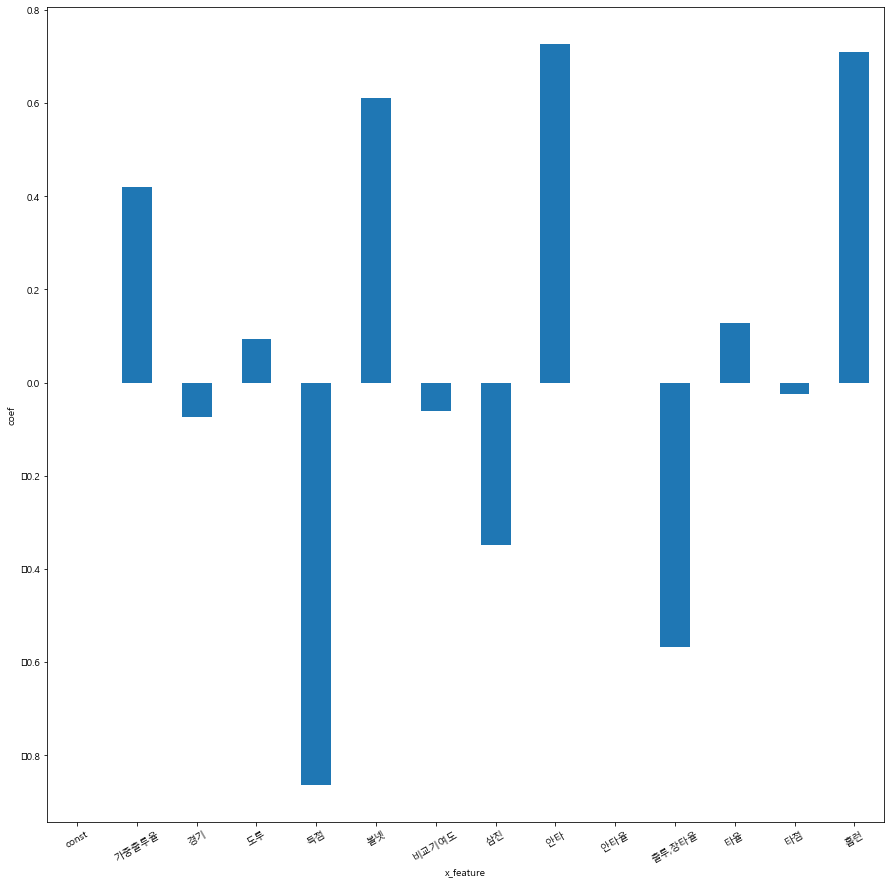

In [6]:
# 회귀계수를 이용해서 시각화
plt.rcParams['figure.figsize'] = [15,15]
coefs = model.params.tolist()      # params = parameters
coef_series = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coef_series.plot(kind = 'bar')
ax.set_ylabel('coef')
ax.set_xlabel('x_feature')
ax.set_xticklabels(x_labels, rotation=30)
plt.show()

In [7]:
bat_df.drop(['가중출루율','경기','비교기여도','안타율'], axis=1, inplace=True) 
bat_df = round(bat_df, 2)
bat_df.head()

,선수명,팀명,안타,홈런,득점,타점,볼넷,삼진,도루,타율,"출루,장타율",연봉(2017)
0,최정,SK,1.34,4.62,1.87,2.60,2.60,1.96,-0.45,0.65,1.73,3.26
1,최형우,KIA,2.07,2.29,2.17,2.82,3.93,1.20,-0.62,0.90,1.40,4.23
2,박건우,두산,2.09,1.59,1.94,1.49,1.11,0.66,2.74,1.13,1.32,0.01
3,나성범,NC,2.02,2.06,2.34,2.16,1.47,2.23,2.24,0.95,1.29,0.51
4,손아섭,롯데,2.38,1.59,2.68,1.56,3.26,1.63,3.58,0.83,1.03,1.48


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


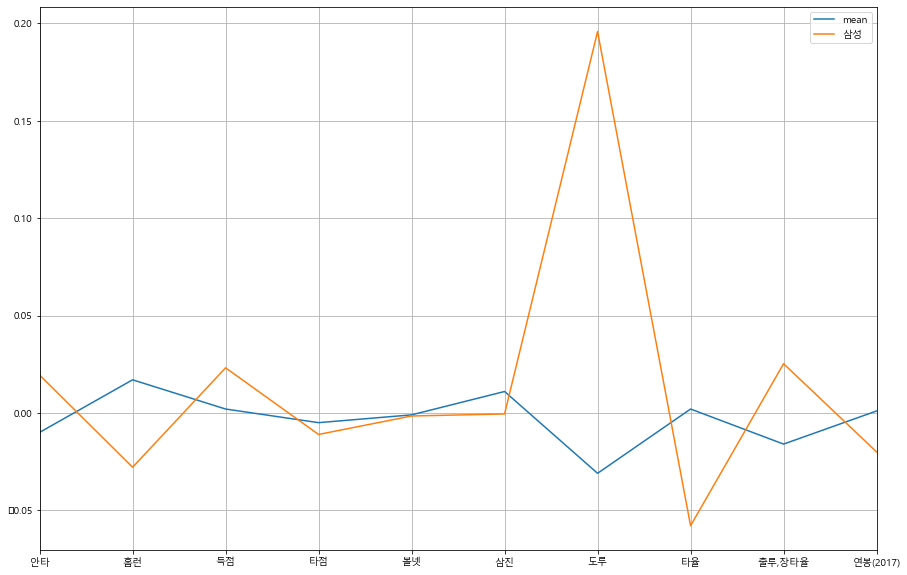

In [8]:
n = len(bat_df.columns[2:])
x_pos = np.arange(n)
plt.rcParams['figure.figsize'] = [15,  10]

bat_df.groupby('팀명').sum().mean().plot(label = 'mean')
bat_df[bat_df['팀명'] == '삼성'].mean().plot(label = '삼성')
plt.xticks(x_pos, bat_df.columns[2:].tolist())
plt.grid(True)
plt.legend()
plt.show()

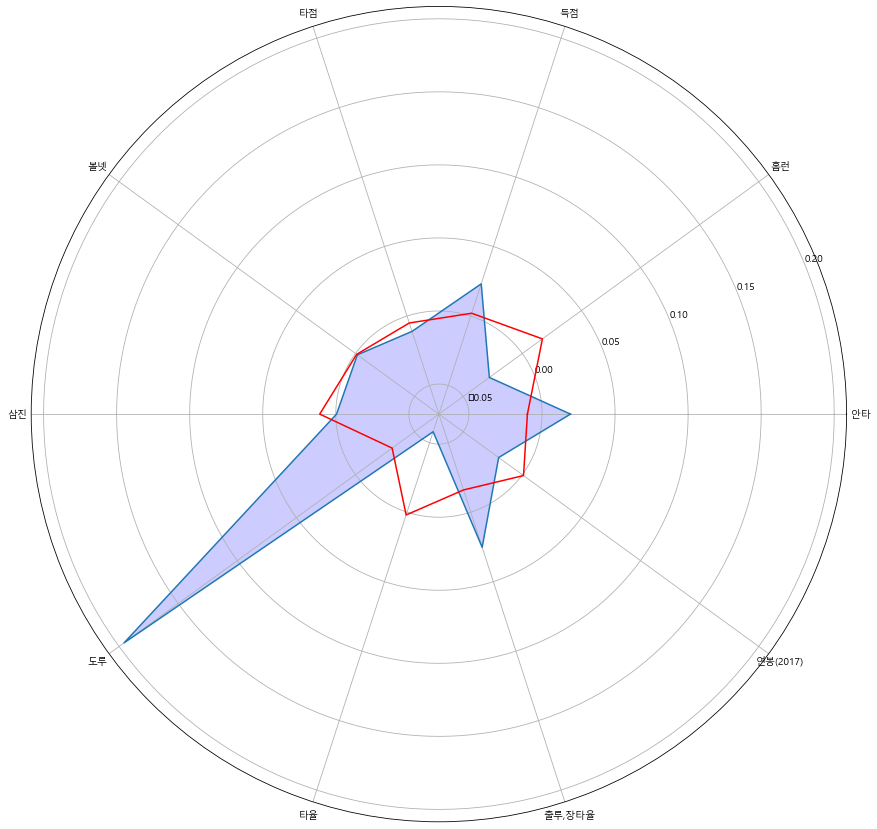

In [23]:
# bat_df[bat_df['팀명'] == '삼성'].mean()
# bat_df.groupby('팀명').sum().mean()

plt.figure(figsize = (15, 15))
plt.subplot(polar=True)

ssv = bat_df[bat_df['팀명'] == '삼성'].mean().values.tolist()
ssv.append(ssv[0])                              # 처음값 추가 -> 끝을 이어줌
mn = bat_df.groupby('팀명').sum().mean().values.tolist()
mn.append(mn[0])                                
mn_i = bat_df.groupby('팀명').sum().mean().index.tolist()

# 세타 = 나누는 각도들[라디안] >> (2pi/개수) x 10조각(+1)
theta=np.arange(len(mn_i)+1)*(2*np.pi/len(mn_i))
# theta = np.linspace(0, 2*np.pi, 10)

plt.plot(theta, ssv)
plt.fill(theta, ssv, 'b', alpha=0.2)
plt.plot(theta, mn, 'r')

# range(0부터, 360도까지, 나누는 각도(증가폭)), 각 지점 이름(라벨)
(lines, labels) = plt.thetagrids(range(0, 360, int(360/len(mn_i))), mn_i)

plt.show()

In [ ]:
# bat999 = pd.read_excel('https://docs.google.com/spreadsheets/d/1iBBXW6FTS_xfN8tl0Bj621dG8FSQ_tySxGdVz9iF-F8/edit?usp=sharing')
# bat999.head()

In [22]:
mn

[-0.010000000000000054,
 0.01699999999999946,
 0.001999999999999691,
 -0.004999999999999805,
 -0.0010000000000001564,
 0.011000000000000032,
 -0.03100000000000098,
 0.001999999999999824,
 -0.015999999999999924,
 0.0009999999999995347,
 -0.010000000000000054]

In [ ]:
theta=np.arange(10)*(2*np.pi/10)
theta